## Introduction to Data Cleaning with Pandas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/n2cholas/dsc-workshops/blob/master/Introduction_to_Data_Cleaning_with_Pandas.ipynb)

Through this workshop, you will learn how to use Pandas to explore and “wrangle” datasets. Topics will include an introduction to Jupyer Notebooks/Colab, data cleaning with pandas, feature engineering with pandas, basic visualization and more. This workshop will focus on actual coding.

If the open in colab button doesn't work, use this link: https://colab.research.google.com/github/n2cholas/dsc-workshops/blob/master/Introduction_to_Data_Cleaning_with_Pandas.ipynb

In [0]:
import pandas as pd
import numpy as np

%matplotlib inline

## Jupyter Tips

Before starting with pandas, let's look at some useful features Jupyter has that will help us along the way.

Typing a function then pressing tab gives you a list of arguments you can enter. Pressing shift-tab gives you the function signature. Also:

In [0]:
?pd.Series # using one question mark gives you the function/class signature with the description
??pd.Series # two question marks gives you the actual code for that function

Timing your pandas code is a very helpful learning tool, so you can figure out the "best" way to do things. You can time code as follows:

In [3]:
%timeit [i for i in range(500)] # in line mode

100000 loops, best of 3: 14.7 µs per loop


In [4]:
%%timeit # time an entire cell
for i in range(10):
    None;

The slowest run took 6.31 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 330 ns per loop


Commands prefaced by "%" or "%%" are called magic commands. You can read about more here: https://ipython.readthedocs.io/en/stable/interactive/magics.html.

## What is Pandas?

Pandas is a Python library for manipulating data and performing analysis. It has too many fefatures to cover in one introductory workshop, but you will find the documentation complete and clear: https://pandas.pydata.org/pandas-docs/stable/. For many tasks, there is likely a Pandas function to make your life easier, so Google away!

The most basic unit in Pandas is called a Series:

In [5]:
s = pd.Series(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object

A series is simply a 1D numpy array with some more functionality built on top. Above, on the left you see an index and on the right are the actual values. The "dtype" is the datatype, which can be anything from objects (usually strings), integers, floats, categorical variables, datetimes, etc. Series are much faster than built in python lists because the numpy backend is written in C.

You can index into a series exactly the same as you would a numpy array:

In [6]:
s[1] #returns the 2nd element (0 indexed)

'b'

In [7]:
s[1:3] #returns a series from indices 1 to 3 (exclusive)

1    b
2    c
dtype: object

In [8]:
s[1::2] #returns series from indices 1 to the end, counting by 2s (i.e. 1, 3, 5)

1    b
3    d
5    f
dtype: object

You also retain the same broadcasting numpy arrays do. For example

In [0]:
s2 = pd.Series([i for i in range(50)])
s2 = s2/50 + 1

In [10]:
s2.sample()

32    1.64
dtype: float64

Next, let's import some data and jump into Dataframes. Dataframes are tables of data, where each column has a name and is a series of some type. Each column can have a different type.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/n2cholas/pokemon-analysis/master/pokemon-data.csv', delimiter=';')
mdf = pd.read_csv('https://raw.githubusercontent.com/n2cholas/pokemon-analysis/master/move-data.csv', delimiter=';')

print('Number of pokemon: ', len(df))
df.sample()

Number of pokemon:  918


,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
44,Baltoy,"['Ground', 'Psychic']",['Levitate'],LC,40,40,55,40,70,55,['Claydol'],"['Harden', 'Confusion', 'Harden', 'Rapid Spin'..."


We can also take samples of different sizes, or look at the top of the dataset, or the bottom:

In [12]:
mdf.head(3)

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
0,1,Pound,Normal,Physical,Tough,35,40,100,1
1,2,Karate Chop,Fighting,Physical,Tough,25,50,100,1
2,3,Double Slap,Normal,Physical,Cute,10,15,85,1


In [13]:
mdf.sample(2)

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
32,33,Tackle,Normal,Physical,Tough,35,40,None,1
313,314,Air Cutter,Flying,Special,Cool,25,60,95,3


In [14]:
mdf.tail()

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
723,724,Searing Sunraze Smash,Steel,Special,???,1,200,None,7
724,725,Menacing Moonraze Maelstrom,Ghost,Special,???,1,200,None,7
725,726,Let's Snuggle Forever,Fairy,Physical,???,1,190,None,7
726,727,Splintered Stormshards,Rock,Physical,???,1,190,None,7
727,728,Clangorous Soulblaze,Dragon,Special,???,1,185,None,7


## Initial Processing

We don't need the index column because Pandas gives us a default index, so let's drop that column. 

In [0]:
mdf.drop('Index', inplace=True, axis=1)
#mdf = mdf.drop(columns='Index') #alternative

Many pandas functions return a changed version of the dataframe instead of modifying the dataframe itself. We can use inplace=True to do it inplace (which is more efficient). Sometimes, when using multiple commands consecutively, we don't want to use inplace.

In [0]:
mdf.columns = ['name', 'type', 'category', 'contest', 'pp', 'power', 'accuracy', 'generation'] #set column names

In [17]:
mdf.dtypes

name          object
type          object
category      object
contest       object
pp             int64
power         object
accuracy      object
generation     int64
dtype: object

Pandas usually does a good job of detecting the datatypes of various columns. We know that power and accuracy should be numbers, but pandas is making them objects (strings). This usually indicates null values. Let's check.

In [18]:
mdf['accuracy'].value_counts()

100     320
None    280
90       46
95       29
85       26
75       10
80        7
70        4
50        3
55        3
Name: accuracy, dtype: int64

Just as we suspected, there is the string "None" for non-numeric values. Let's fix this.

In [0]:
mdf['accuracy'].replace('None', 0, inplace=True)
# notice mdf.accuracy.replace(..., inplace=True) wouldn't work
mdf['accuracy'] = pd.to_numeric(mdf['accuracy'])

In [20]:
mdf.power == 'None'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
698    False
699    False
700    False
701     True
702    False
703    False
704    False
705    False
706    False
707    False
708    False
709    False
710    False
711    False
712    False
713    False
714     True
715    False
716     True
717    False
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
Name: power, Length: 728, dtype: bool

In [21]:
mdf[mdf.power == 'None'].head()

,name,type,category,contest,pp,power,accuracy,generation
11,Guillotine,Normal,Physical,Cool,5,None,0,1
13,Swords Dance,Normal,Status,Beautiful,20,None,0,1
17,Whirlwind,Normal,Status,Clever,20,None,0,1
27,Sand Attack,Ground,Status,Cute,15,None,100,1
31,Horn Drill,Normal,Physical,Cool,5,None,0,1


In [22]:
mdf.loc[mdf.power == 'None', 'power'].head()

11    None
13    None
17    None
27    None
31    None
Name: power, dtype: object

.loc is a common way to index into a Dataframe. The first argument is the index (or list of indices), or a boolean array that acts as a mask. iloc can be used similarly, except the first number is the actual numeric index (notice that a Dataframe index can be non-numeric). 

In [0]:
mdf.loc[mdf.power == 'None', 'power'] = 0
mdf['power'] = pd.to_numeric(mdf['power'])

In [24]:
mdf.dtypes

name          object
type          object
category      object
contest       object
pp             int64
power          int64
accuracy       int64
generation     int64
dtype: object

We were able to convert them with no issues. Notice the two ways to access columns. The only difference between the two is that the dictionary-style access allows you to modify the column, and allows you to create new columns. You can only use the .column method for existing columns, and it returns a copy (so the modifications won't affect the original Dataframe). Also, notice you can't access columns with spaces in their names with the .column notation.

Although the dictionary-style access is more consistent, I like to use the .column access whenever I can because it is faster to type.

In [25]:
df.columns = ['name', 'types', 'abilities', 'tier', 'hp', 'atk', 'def', 'spa', 'spd', 'spe', 'next_evos','moves']
df.dtypes

name         object
types        object
abilities    object
tier         object
hp            int64
atk           int64
def           int64
spa           int64
spd           int64
spe           int64
next_evos    object
moves        object
dtype: object

We saw above that the next_evos, moves, abilities, and types columns should be lists, so we can do that.

In [0]:
temp_df = df.copy()

In [27]:
%%timeit
for ind, row in temp_df.iterrows():
    df.at[ind, 'next_evos'] = eval(row['next_evos'])

10 loops, best of 3: 166 ms per loop


A few notes. This seems like the most obvious way to achieve what we want. Look through the rows using iterrows, use python's "eval" to turn a string-list into an actual list, then assign it to the dataframe at that index. Notice that we use "at", which is the same as "loc" except it can only access one value at a time. 

This turns out to be the worst way to do this. In pandas, we can almost always avoid explicitly looping through our data.

In [28]:
%%timeit
df['types'] = temp_df.apply(lambda x: eval(x.types), axis=1)

10 loops, best of 3: 31 ms per loop


This is much better. The apply function applies a function you give it to all the rows or columns in the dataframe. The axis argument specifies whether it's rows or columns. We can make this a bit cleaner.

In [29]:
%%timeit
df['abilities'] = temp_df.abilities.map(eval)

100 loops, best of 3: 7.04 ms per loop


This is very clean. While apply works on a dataframe, map works on a single series. Also, since the value is always just applied to the one column, we can just pass the eval function instead of using a lambda. Our next improvement won't be faster, but it'll be nicer

In [0]:
from tqdm import tqdm
tqdm.pandas()

In [31]:
df['moves'] = temp_df.moves.progress_map(eval)

100%|██████████| 918/918 [00:00<00:00, 7144.41it/s]


tqdm is a library that provides progress bars for loops, but it can be easily used with pandas to provide a progress bar for your maps and applies. Very useful for doing complex processing on large datasets.

Next, notice that our dataframe has one row per pokemon. It would be nice to index into by the pokemon name rather than a number. If we are going to access rows by pokemon name often, this will give us a speed advantage, since the items in the index are supported in the backend by a hashtable. 

In [0]:
df.set_index('name', inplace=True)

In [33]:
df.loc['Pikachu']

types                                               [Electric]
abilities                              [Lightning Rod, Static]
tier                                                       NaN
hp                                                          35
atk                                                         55
def                                                         40
spa                                                         50
spd                                                         50
spe                                                         90
next_evos                               [Raichu, Raichu-Alola]
moves        [Tail Whip, Thunder Shock, Growl, Play Nice, T...
Name: Pikachu, dtype: object

We can also reset_index, which can be useful sometimes. Now that we've done some processing, we can produce a summary of the numeric columns:

In [34]:
df.describe()

,hp,atk,def,spa,spd,spe
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,69.558824,80.143791,74.535948,73.297386,72.384532,68.544662
std,26.066527,32.697233,31.225467,33.298652,27.889548,29.472307
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,66.500000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


## Data Correction

Typically, you will find oddities in your data during analysis. Perhaps you visualize a column, and the numbers look off, so you look into the actual data and notice some issues. For the purpose of this workshop, we'll skip the visualization and just correct the data

First, some pokemon have moves duplicated. Let's fix this by making the move-lists into movesets

In [35]:
df['moves'] = df.moves.progress_map(set)

100%|██████████| 918/918 [00:00<00:00, 61955.86it/s]


Next, I noticed a weird quirk with the strings for the moves. This will cause some trouble if we want to relate the mdf and df tables, so let's fix it.

In [0]:
moves = {move for move_set in df.moves for move in move_set}

In [37]:
weird_moves = {m for m in moves if "'" in m}
weird_moves

{"Baby'Doll Eyes",
 "Double'Edge",
 "Forest's Curse",
 "Freeze'Dry",
 "King's Shield",
 "Land's Wrath",
 "Lock'On",
 "Mud'Slap",
 "Multi'Attack",
 "Nature's Madness",
 "Power'Up Punch",
 "Self'Destruct",
 "Soft'Boiled",
 "Topsy'Turvy",
 "Trick'or'Treat",
 "U'turn",
 "Wake'Up Slap",
 "Will'O'Wisp",
 "X'Scissor"}

Many of these moves, such as U-turn, should have a dash instead of an apostrophe (according to the moves dataset). Upon closer inspection, it's clear that the only moves that should have an apostrophe are those whose words end with an apostrophe-s. Let's make this correction.

In [38]:
weird_moves.remove("King's Shield")
weird_moves.remove("Forest's Curse")
weird_moves.remove("Land's Wrath")
weird_moves.remove("Nature's Madness")

df['moves'] = df.moves.progress_map(lambda x: {move if move not in weird_moves else move.replace("'", "-")
                                         for move in x})

100%|██████████| 918/918 [00:00<00:00, 38849.08it/s]


In [39]:
removal_check = {move for move_set in df.moves for move in move_set if "'" in move}
removal_check

{"Forest's Curse", "King's Shield", "Land's Wrath", "Nature's Madness"}

The moves dataframe contains moves that are unlearnable by pokemon. These include moves like Struggle (which is a move pokemon use when they have no more pp in their normal moveset) and Z-moves (moves that are activated by a Z-crystal). These moves are characterized by having only 1 PP (which denotes the number of times a pokemon can use the move). Let's remove these.

In [0]:
mdf = mdf[(mdf.pp != 1) | (mdf.name == 'Struggle')]

Due to the nature of the site we scraped, some pokemon are missing moves :(. Let's fix part of the problem by adding back some important special moves:

In [0]:
df.loc['Victini', 'moves'].add('V-create')
df.loc['Rayquaza', 'moves'].add('V-create')
df.loc['Celebi', 'moves'].add('Hold Back')

for pok in ['Zygarde', 'Zygarde-10%', 'Zygarde-Complete']:
    df.loc[pok, 'moves'].add('Thousand Arrows')
    df.loc[pok, 'moves'].add('Thousand Waves')
    df.loc[pok, 'moves'].add('Core Enforcer')

Let's say for our analysis, we only care about certain tiers. Furthermore, we want to consolidate tiers. Let's do it:

In [0]:
df.loc[df.tier == 'OUBL','tier'] = 'Uber'
df.loc[df.tier == 'UUBL','tier'] = 'OU'
df.loc[df.tier == 'RUBL','tier'] = 'UU'
df.loc[df.tier == 'NUBL','tier'] = 'RU'
df.loc[df.tier == 'PUBL','tier'] = 'NU'
df = df[df['tier'].isin(['Uber', 'OU', 'UU', 'NU', 'RU', 'PU'])]

The last line eliminates all pokemon that do not belong to one of those tiers (i.e. LC).

## (very light) Feature Engineering

Let's make a feature counting the number of moves a pokemon can learn.

In [0]:
df['num_moves'] = df.moves.map(len)

The base stat total is a common metric players use to assess a Pokemon's overall strength, so let's create a column for this.

In [0]:
df['bst'] = df['hp'] + df['atk'] + df['def'] + df['spa'] + df['spd'] + df['spe']

## Anomaly Analysis

This workshop is about data cleaning, but a useful way to look for data issues, gain ideas for feature engineering, and understand your data is to look at anomalies. Plus, we can look at some new pandas techniques.

Let's look at information about the BST by tier:

In [45]:
bstdf = df[['tier', 'bst']].groupby('tier').agg([np.mean, np.std])
bstdf

bst           
            mean        std
tier                       
NU    495.132353  36.655681
OU    565.896104  68.916155
PU    464.184685  59.964976
RU    524.486111  48.101124
UU    538.181818  50.624685
Uber  657.042553  67.435946

First, we get a dataframe containing each pokemon's tier and base stat total. We want the mean and standard deviation of the BST's by tier. So, we group by the tier. In pandas, we can group by multiple columns if you want. Then, we apply aggregate function mean and std. This will calculate mean and std within each tier.

You'll notice that we now have a multiindex for the columns. We will not cover this in this workshop, so we will just simplify the multiindex.

In [46]:
bstdf.columns = ['bst_mean', 'bst_std']
bstdf

,bst_mean,bst_std
tier,,
NU,495.132353,36.655681
OU,565.896104,68.916155
PU,464.184685,59.964976
RU,524.486111,48.101124
UU,538.181818,50.624685
Uber,657.042553,67.435946


The main ways to join tables in pandas are join and merge. Join is typically used to join on an index. For example, if you had two tables with the pokemon name as the index, you can do df1.join(df2), and this will horizontally concatenate the tables based on index.

I will show you how to use merge, which is the most general and easiest to understand joining method (though not always the fastest).

In [47]:
df2 = df.reset_index().merge(bstdf, left_on='tier', right_on='tier', how='left')
# equivalent to bstdf.merge(df, ..., how='right')
df2.sample()

,name,types,abilities,tier,hp,atk,def,spa,spd,spe,next_evos,moves,num_moves,bst,bst_mean,bst_std
192,Gourgeist-Super,"[Ghost, Grass]","[Frisk, Insomnia, Pickup]",PU,85,100,122,58,75,54,[],"{Incinerate, Hyper Beam, Rest, Toxic, Pain Spl...",67,494,464.184685,59.964976


Basically, pandas looked for where the tier in df equaled tier in bstdf and concatenated those rows. left_on is the column for df, right_on is the column for bstdf (in this case they're the same). You can learn more about how joins work in this article: https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/. The concepts carry over to pandas.

We want to look at anomalous pokemon who's stats seem too low for their tiers. Let's accomplish this:

In [48]:
under = df2[(df2['bst'] < df2['bst_mean'] - 2*df2['bst_std']) & (df2['tier'] != 'PU')]
under

,name,types,abilities,tier,hp,atk,def,spa,spd,spe,next_evos,moves,num_moves,bst,bst_mean,bst_std
5,Aegislash,"[Steel, Ghost]",[Stance Change],Uber,60,50,150,50,150,60,[],"{Hyper Beam, Retaliate, Rest, Aerial Ace, Wide...",55,520,657.042553,67.435946
6,Aegislash-Blade,"[Steel, Ghost]",[Stance Change],Uber,60,150,50,150,50,60,[],"{Hyper Beam, Retaliate, Rest, Aerial Ace, Wide...",55,520,657.042553,67.435946
34,Azumarill,"[Water, Fairy]","[Huge Power, Sap Sipper, Thick Fat]",OU,100,50,80,60,80,50,[],"{Bounce, Splash, Refresh, Focus Punch, Dynamic...",96,420,565.896104,68.916155
115,Diggersby,"[Normal, Ground]","[Cheek Pouch, Huge Power, Pickup]",OU,85,56,77,50,77,78,[],"{Gastro Acid, Rollout, Hyper Beam, Rest, Bounc...",81,423,565.896104,68.916155
267,Linoone,[Normal],"[Gluttony, Pickup, Quick Feet]",RU,78,70,61,50,61,100,[],"{Thunder, Fury Cutter, Fury Swipes, Double Tea...",89,420,524.486111,48.101124
298,Marowak-Alola,"[Fire, Ghost]","[Cursed Body, Lightning Rod, Rock Head]",UU,60,80,110,50,80,45,[],"{Shadow Bone, Hyper Beam, Retaliate, Bone Club...",74,425,538.181818,50.624685
303,Medicham,"[Fighting, Psychic]","[Pure Power, Telepathy]",NU,60,60,75,60,75,80,[],"{Pain Split, Magic Coat, Focus Punch, Dynamic ...",96,410,495.132353,36.655681
521,Vivillon,"[Bug, Flying]","[Compound Eyes, Friend Guard, Shield Dust]",NU,80,52,50,90,50,89,[],"{String Shot, Hyper Beam, Bug Buzz, Rest, Aeri...",59,411,495.132353,36.655681


## Misc.

Pandas also has built in graphing functionalities which behave identically to matplotlib. For example:

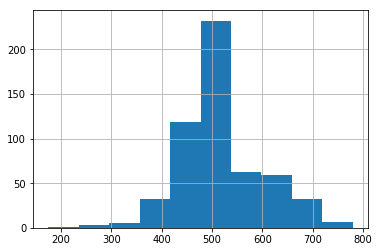

In [49]:
df.bst.hist()

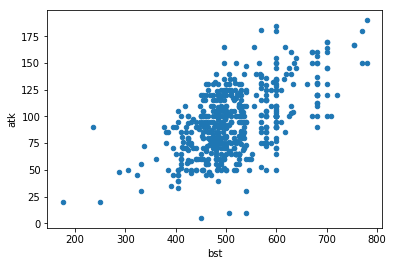

In [50]:
df.plot.scatter('bst', 'atk')

Finally, we can "pivot" tables as you would in excel. This provides a summary of the data.

In [0]:
df['type_1'] = df['types'].map(lambda x: x[0])

In [52]:
pd.pivot_table(df, index='tier', columns='type_1', values='bst', aggfunc='mean')

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
tier,,,,,,,,,,,,,,,,,,
NU,476.500000,494.000000,487.500000,460.500000,473.500000,469.625000,534.400000,479.000000,483.750000,506.250000,486.250,525.000000,495.400000,457.0,520.000000,519.50,520.000000,520.750000
OU,567.500000,520.000000,644.444444,562.142857,483.000000,524.250000,607.600000,518.333333,476.000000,542.166667,519.000,505.000000,497.000000,495.0,598.250000,700.00,550.000000,576.428571
PU,426.521739,448.300000,NaN,473.800000,392.666667,461.333333,485.454545,447.090909,479.400000,478.476190,457.875,511.727273,457.342857,472.6,465.266667,494.00,380.000000,459.000000
RU,490.166667,510.000000,536.500000,543.750000,516.000000,527.000000,573.333333,495.000000,518.333333,546.500000,480.000,552.500000,523.571429,487.0,545.428571,505.75,546.000000,538.500000
UU,485.800000,531.714286,598.000000,540.000000,525.000000,531.500000,517.000000,536.250000,500.000000,586.000000,512.250,NaN,559.500000,507.5,547.500000,585.00,543.333333,544.166667
Uber,585.000000,640.000000,686.800000,NaN,680.000000,612.500000,613.333333,626.666667,600.000000,NaN,720.000,NaN,655.000000,540.0,682.153846,NaN,580.000000,720.000000
